In [1]:
import pandas as pd
import numpy as np #For mathematical caculations
import matplotlib.pyplot as plt #For plotting graphs
from datetime import datetime # To access datetime
from pandas import Series # To work on series

In [2]:
%matplotlib inline

In [3]:
import warnings # To ignore the warnings
warnings.filterwarnings("ignore")

In [4]:
train=pd.read_csv("Train_SU63ISt.csv")  #Reading the file 

In [5]:
test=pd.read_csv("Test_0qrQsBZ.csv") #Reading the file

In [6]:
train_original=train.copy()
test_original=test.copy()

In [7]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [8]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [9]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [10]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [11]:
train.shape

(18288, 3)

In [12]:
test.shape

(5112, 2)

In [13]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [14]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


# Feature Extraction

In [15]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [16]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [17]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [18]:
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [19]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [20]:
# 1 if the day of week is a weekend and 0 if the day of week in not a weekend.
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [21]:
temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

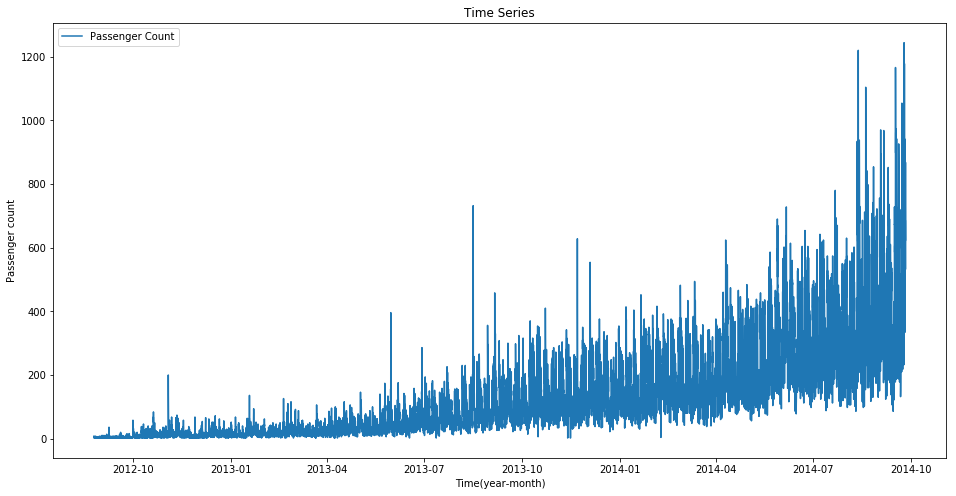

In [22]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis.
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.


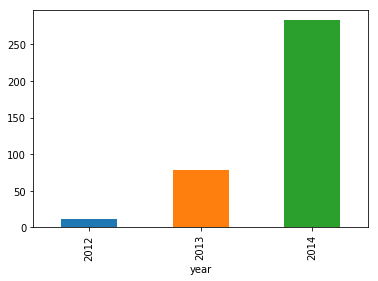

In [23]:
train.groupby('year')['Count'].mean().plot.bar()

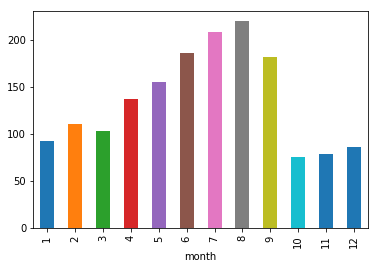

In [24]:
train.groupby('month')['Count'].mean().plot.bar()

In [26]:
train.groupby(['year', 'month'])['Count'].mean()

year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64

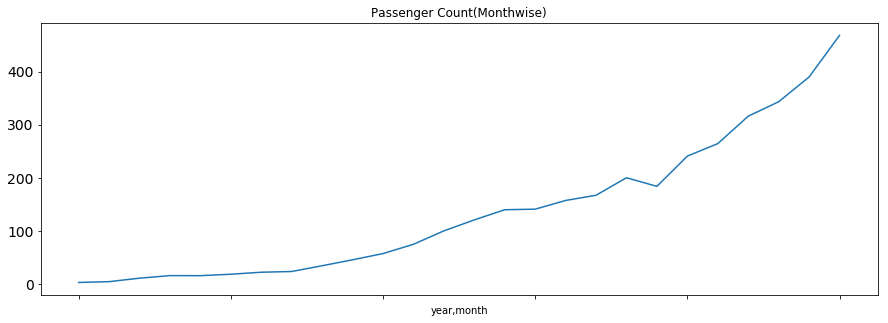

In [25]:
temp=train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

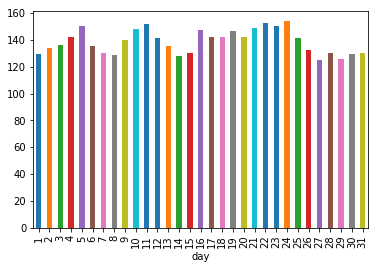

In [27]:
train.groupby('day')['Count'].mean().plot.bar()

In [ ]:
train.groupby('Hour')['Count'].mean().plot.bar()